<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/MiniHackethon2_U2_MH2_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Perform customer segmentation using bank data into distinct categories based on their behavioral patterns

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand clustering
* Find groups or clusters using K-means algorithm
* Visualize the high-dimensional data to low-dimensional data (2D) by applying t-SNE algorithm

In [ ]:
#@title  Mini Hackathon Walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Customer_Segmentation.mp4" type="video/mp4">
</video>
""")

## Domain Information

- **Customer segmentation** refers to the process of dividing a set of potential customers into groups (or segments) based on shared attributes, interests, and behaviors.
- One of the key pain points for bank marketing team is to know their customers and identify their needs.
- For this mini-hackathon, we will use the popular **K-Means clustering** algorithm to segment customers based on their behavior from the bank data. The basic concept is that consumers who share common traits would respond to marketing communication in a similar way so that the bank marketing team can reach out to each group in a relevant and effective way.

## Dataset

### Description

The dataset chosen for this mini hackathon is the behavior of customers in the bank for 6 months, this dataset is made up of 13 features.

**Attribute Information**

- **CUSTID:** Identification of Credit Cardholder
- **BALANCE:** Balance amount left in customer's account to make purchases
- **PURCHASES:** Amount of purchases made from the account
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
- **CASH_ADVANCE:** Cash in advance given by the user
- **PURCHASES_FREQUENCY:** How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
- **CREDIT_LIMIT:** Limit of Credit Card for user
- **PAYMENTS:** Amount of Payment done by a user
- **MINIMUM_PAYMENTS:** Minimum amount of payments made by a user
- **PRC_FULL_PAYMENT:** Percent of full payment paid by a user
- **TENURE:** Tenure of credit card service for user

**Note:** The currency values mentioned above are in "dollars"

## Grading = 10 Marks

## Setup Steps

In [ ]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()

notebook="U2_MH2_Customer_Segmentation" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Marketing_data_clustering.csv")
    print ("Setup completed successfully")
    return

setup()

Setup completed successfully


### Importing Required Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## **Stage 1:** Data Pre-Processing (2 Marks)

- Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values

- Perform correlation on the data features and remove highly correlated features from the data
  
  Hint: Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

- Drop any unwanted columns
  
  Hint: Use pandas [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- Perform `StandardScaler()` on the data features
  
  Hint: Use Sklearns [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [ ]:
# YOUR CODE HERE
df = pd.read_csv('Marketing_data_clustering.csv')

#  remove null vlaues with mean
def mydata(x):
  if(x.isna().sum() > 0):
    return x.fillna(x.mean())
  else:
    return x
df=df.apply(mydata)

df.isna().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
CASH_ADVANCE_FREQUENCY    0
CASH_ADVANCE_TRX          0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

In [ ]:
#  correaltion
features= df.drop('CUST_ID',axis=1)


correlation_matrix = features.corr()
threshold = 0.8

<Axes: >

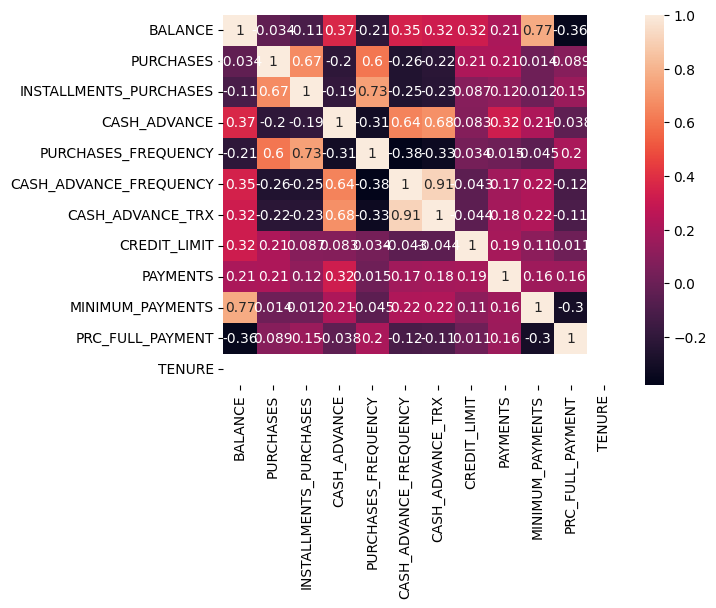

In [ ]:
sns.heatmap(features.corr(),annot = True)

In [ ]:
print(corr_matrix.columns)
print(corr_matrix.columns[1])
print(corr_matrix.iloc[0,0])

Index(['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
PURCHASES
1.0


In [ ]:
def remove_Highly_Correlated(df, bar=0.8):
  # Creates correlation matrix
  corr = df.corr()

  # Set Up Mask To Hide Upper Triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))
  tri_df = corr.mask(mask)

  # Finding features with correlation value more than specified threshold value (bar=0.9)
  highly_cor_col = [col for col in tri_df.columns if any(tri_df[col] > bar )]
  print("length of highly correlated columns",len(highly_cor_col))

  # Drop the highly correlated columns
  print(highly_cor_col)
  reduced_df = df.drop(highly_cor_col, axis = 1)
  print("shape of data",df.shape,"shape of reduced data",reduced_df.shape)
  return reduced_df

reduced_df=remove_Highly_Correlated(features)
reduced_df.head()

length of highly correlated columns 1
['CASH_ADVANCE_FREQUENCY']
shape of data (2994, 12) shape of reduced data (2994, 11)


,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,95.4,0.00000,0.166667,0,1000.0,201.802084,139.509787,0.0,12
1,817.714335,16.00,0.0,0.00000,0.083333,0,1200.0,678.334763,244.791237,0.0,12
2,1823.652743,436.20,436.2,0.00000,1.000000,0,2300.0,679.065082,532.033990,0.0,12
3,1014.926473,861.49,200.0,0.00000,0.333333,0,7000.0,688.278568,311.963409,0.0,12
4,2772.772734,0.00,0.0,346.81139,0.000000,1,3000.0,805.647974,989.962866,0.0,12


In [ ]:
#  standared scaling of data:
sd=StandardScaler()
scaled_df = sd.fit_transform(reduced_df)
scaled_df

array([[-1.13359969, -0.63261322, -0.31715131, ..., -0.94317715,
        -0.41444166,  0.        ],
       [-0.37630323, -0.8116596 , -0.6893926 , ..., -0.64209751,
        -0.41444166,  0.        ],
       [ 0.60436139,  0.13588811,  1.01261629, ...,  0.1793477 ,
        -0.41444166,  0.        ],
       ...,
       [-1.15745725,  0.14783957,  0.5467294 , ..., -1.08096394,
         4.45174987,  0.        ],
       [-1.1077884 , -0.18251679,  0.46166798, ..., -0.86420132,
         3.9651351 ,  0.        ],
       [-0.87406153,  1.20272491,  1.26155753, ..., -0.82950517,
        -0.41444166,  0.        ]])

## **Stage 2:** K Means (3 Marks)

- Find the right number of clusters to be chosen using the elbow method
  
- Perform K-Means on the chosen optimal number of clusters

  **Hint:** Refer to this [link](https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac) for finding the k-clusters using elbow method and applying kmeans

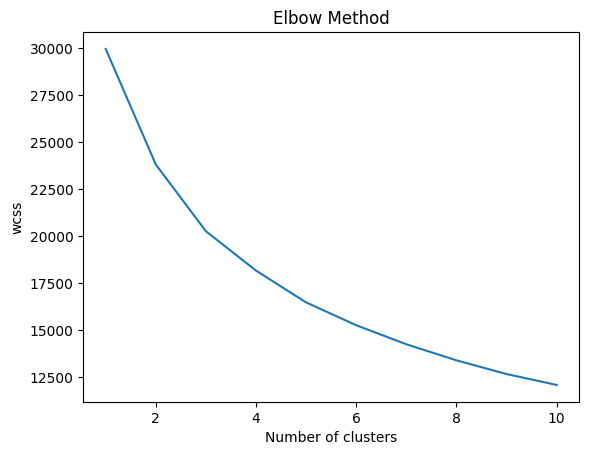

In [ ]:
# YOUR CODE HERE

wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

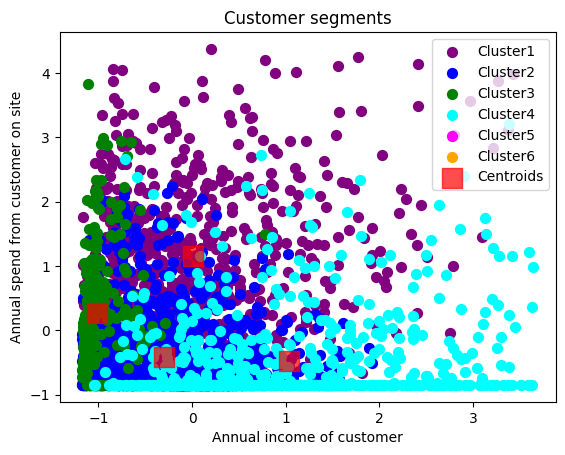

In [ ]:
# from elbow joints best values is from 4,5,6 mostly 5

def plot_for_given_k_values(k):
  km=KMeans(n_clusters=k,init='k-means++', max_iter=300, n_init=10, random_state=0)
  X=scaled_df
  y_means = km.fit_predict(X)
  #Visualizing the clusters
  plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')

  plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
  plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
  plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
  plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
  plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')
  plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
  plt.title('Customer segments')
  plt.xlabel('Annual income of customer')
  plt.ylabel('Annual spend from customer on site')
  plt.legend()
  plt.show()
  return km, y_means
km,clusters=plot_for_given_k_values(4)


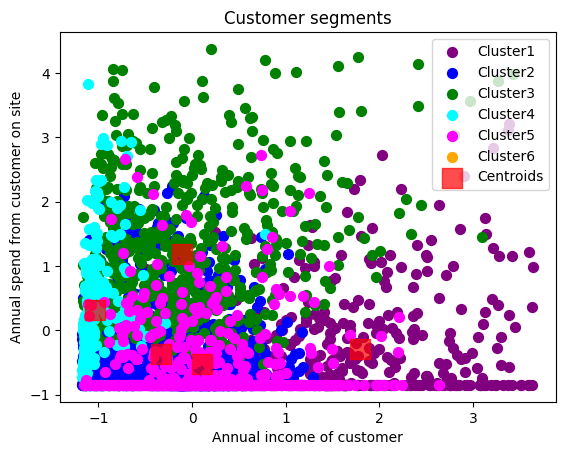

In [ ]:
km,clusters=plot_for_given_k_values(5)

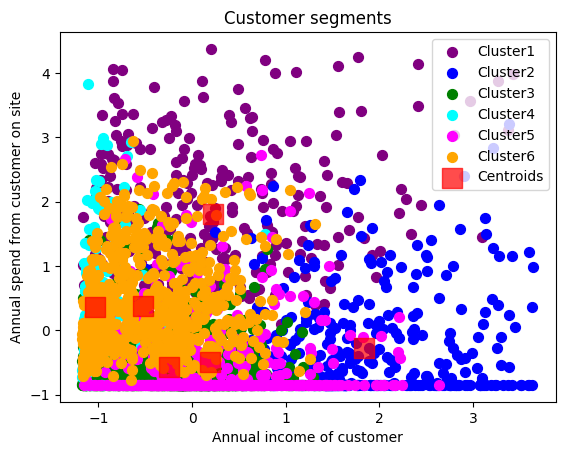

In [ ]:
km,clusters=plot_for_given_k_values(6)

## **Stage 3:** Apply **TSNE** with 2 components (n_components = 2) and visualize the clusters (3 Marks)

Hint: Use Sklearns [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

**Note:** Produce a visualization with distinctly isolated clusters and It is not necessary to plot the centroids



In [ ]:
# YOUR CODE HERE
tsne = TSNE(n_components=2).fit_transform(scaled_df)


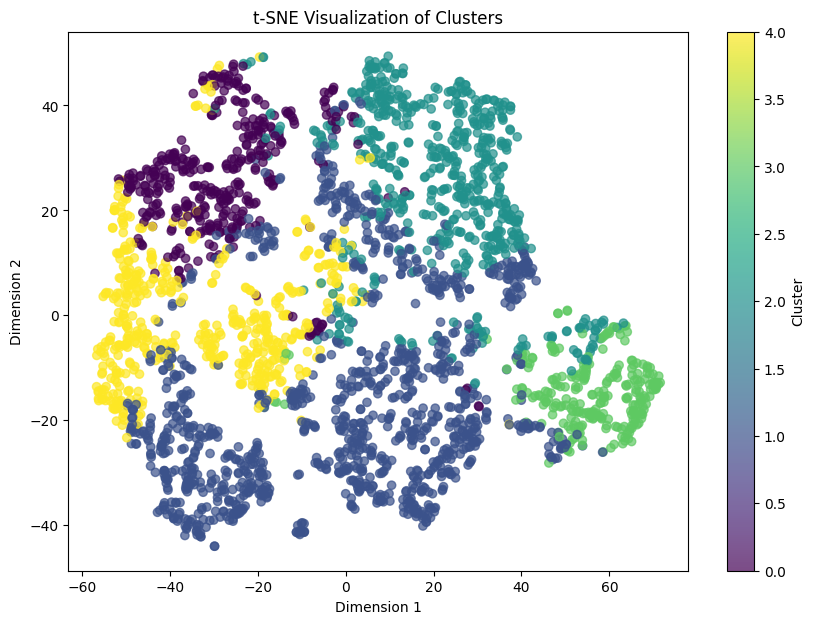

In [ ]:

tsne_df = pd.DataFrame(tsne, columns=['Dimension 1', 'Dimension 2'])

# Assuming you have cluster labels in `cluster_labels`
tsne_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## **Stage 4:** Insights for each cluster

#### **Stage 4(a)** (1 Mark):
- To understand the behavior of the customers from each cluster print the respective centroid point values obtained from the scaled dataframe
- Get the original representation of the scaled centroid points using [inverse_transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform) technique

In [ ]:
# YOUR CODE HERE
scaled_centroids = km.cluster_centers_

print('scaled_centroids',scaled_centroids)


origial_centroids = sd.inverse_transform(scaled_centroids)

print('original_centroids',origial_centroids)

scaled_centroids [[ 1.78806795 -0.28559932 -0.40332784  0.45754836 -0.41637893  0.3931781
   0.88702229  0.3285686   1.56269725 -0.39789504  0.        ]
 [-0.33692824 -0.36485905 -0.47497311 -0.45524168 -0.37757802 -0.36761892
  -0.29196513 -0.45327286 -0.33117599 -0.305756    0.        ]
 [-0.10865721  1.18759759  1.39494802 -0.398473    1.19616642 -0.42519453
   0.09851409  0.24357936  0.11648283 -0.24794261  0.        ]
 [-1.04079772  0.3159072   0.51521353 -0.50051832  0.90127697 -0.58385536
   0.15842804 -0.14211771 -0.87412124  2.5796729   0.        ]
 [ 0.10411448 -0.52285947 -0.52847035  1.45683597 -0.70584206  1.37548891
  -0.18698225  0.59227689 -0.09592114 -0.01295486  0.        ]]
original_centroids [[3.03786593e+03 2.49286967e+02 7.33142159e+01 7.14475541e+02
  2.36932285e-01 2.73007712e+00 5.34100257e+03 1.04411732e+03
  1.01576331e+03 1.13343959e-03 1.20000000e+01]
 [8.58104101e+02 2.14138407e+02 5.49525809e+01 1.21265533e+02
  2.51383087e-01 8.86307054e-01 2.48468880e+0

In [ ]:
scaled_df

array([[-1.13359969, -0.63261322, -0.31715131, ..., -0.94317715,
        -0.41444166,  0.        ],
       [-0.37630323, -0.8116596 , -0.6893926 , ..., -0.64209751,
        -0.41444166,  0.        ],
       [ 0.60436139,  0.13588811,  1.01261629, ...,  0.1793477 ,
        -0.41444166,  0.        ],
       ...,
       [-1.15745725,  0.14783957,  0.5467294 , ..., -1.08096394,
         4.45174987,  0.        ],
       [-1.1077884 , -0.18251679,  0.46166798, ..., -0.86420132,
         3.9651351 ,  0.        ],
       [-0.87406153,  1.20272491,  1.26155753, ..., -0.82950517,
        -0.41444166,  0.        ]])

In [ ]:
reduced_df.isna().sum()

BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
CASH_ADVANCE_TRX          0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

#### **Stage 4(b)** (1 Mark):
- Report your observations in the form of text, about the customers based on the centroid points

Hint: If require use [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

<Figure size 800x600 with 0 Axes>

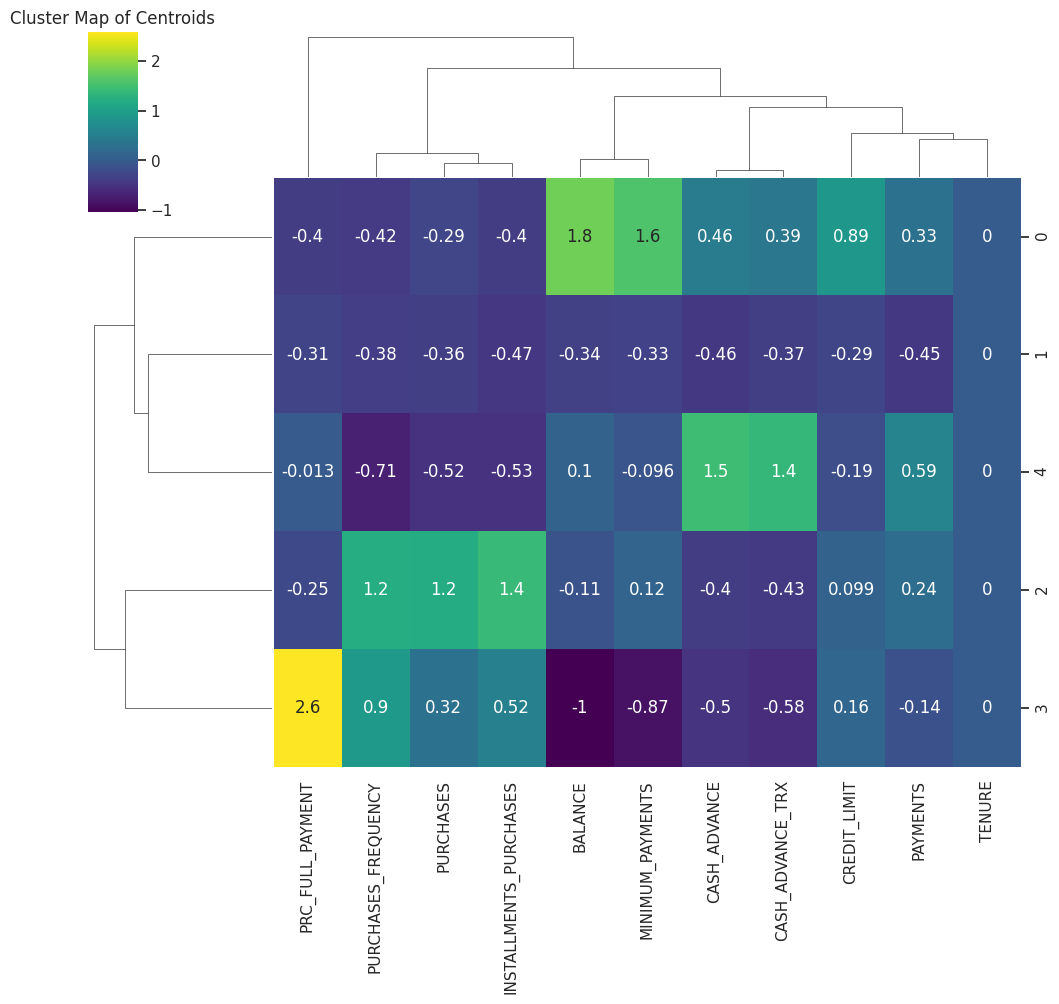

In [ ]:
# YOUR ANALYSIS HERE
import seaborn as sns

centroids_df = pd.DataFrame(scaled_centroids, columns=reduced_df.columns)
plt.figure(figsize=(8, 6))
# Create a cluster map

sns.clustermap(centroids_df, cmap='viridis', annot=True)
plt.title('Cluster Map of Centroids')
plt.show()
